In [1]:
!wget 'https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction' -O Employee.csv

--2023-01-29 11:45:11--  https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'Employee.csv'

Employee.csv            [ <=>                ]  13.31K  --.-KB/s    in 0.007s  

2023-01-29 11:45:12 (1.98 MB/s) - 'Employee.csv' saved [13630]



In [2]:
import pandas as pd

In [10]:
empl = pd.read_csv('Employee.csv', sep = ',')

## посмотрим на данные

In [14]:
empl.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Пропущенных значений нет, минимумы и максимумы выглядят адекватно.
Посмотрим распределения

In [23]:
empl['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

Таргет - LeaveOrNot.
Количественных признаков нет

In [24]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Посмотрим распределения')

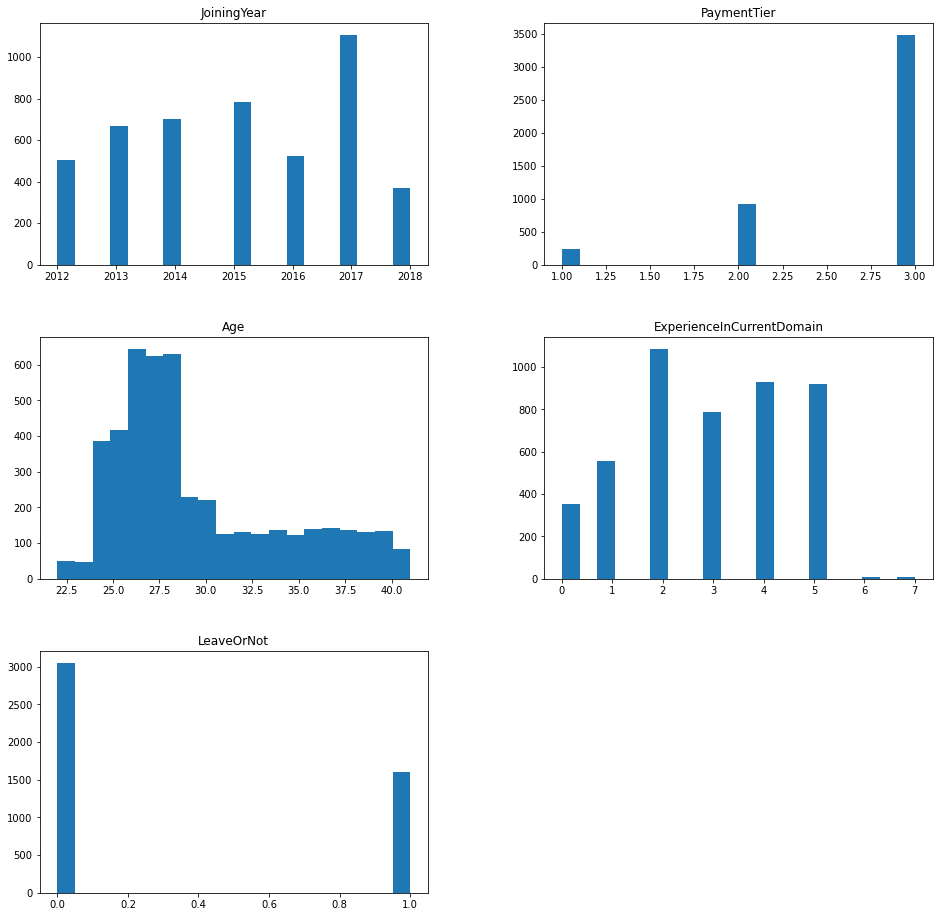

In [56]:
empl.hist(figsize=(16, 16), bins=20, grid=False);
plt.title('Посмотрим распределения')



Большинство сотрудников от 26 - 28 лет. Уровень зп в основном выскокий, основной набор в 2017 году, уволилось примерно треть сотрудников


In [63]:
corr_matrix = empl.corr()
corr_matrix = np.round(corr_matrix, 2) # округляем 
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0# все, что меньше 30% 


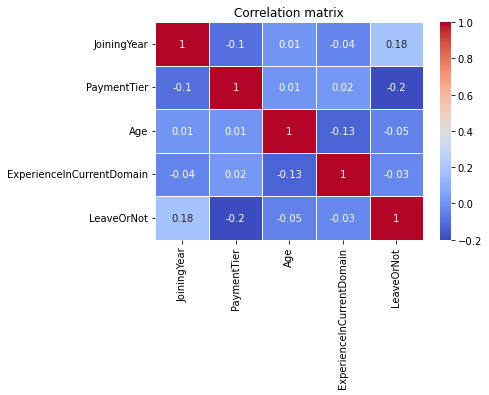

In [64]:
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') 

plt.title('Correlation matrix')
plt.show()


Корреляция отсутствует

In [98]:
ml=empl[empl['Gender']=='Male'].groupby(['LeaveOrNot'])['Gender'].value_counts()
ml
fl = empl[empl['Gender']=='Female'].groupby(['LeaveOrNot'])['Gender'].value_counts()


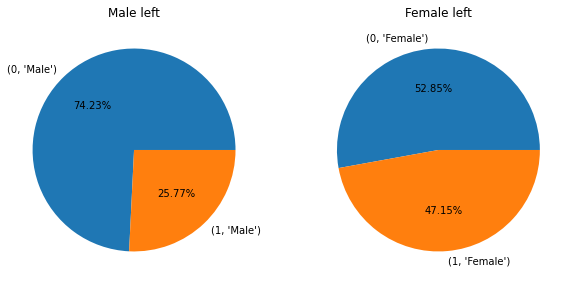

In [99]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.title('Male left')
plt.pie(ml.values, labels=ml.index, autopct='%.2f%%');

plt.subplot(122)
plt.title('Female left')
plt.pie(fl.values, labels=fl.index, autopct='%.2f%%');

Мужчины увольняются реже, тогда как женщин увольняется почти половина.
Похоже, что для таргета признак пол является важным. Посмотрим зависимость ЗП 

In [146]:
pm=empl[(empl['LeaveOrNot']==1)].groupby(['LeaveOrNot'])['Gender'].value_counts()
pf=empl[(empl['Gender']=='Female')&(empl['LeaveOrNot']==1)].groupby(['PaymentTier'])['Gender'].value_counts()#


In [153]:
pf=empl[(empl['Gender']=='Female')&(empl['LeaveOrNot']==1)]['PaymentTier'].value_counts()
pm=empl[(empl['Gender']=='Male')&(empl['LeaveOrNot']==1)]['PaymentTier'].value_counts()

In [179]:
pleft=empl[(empl['LeaveOrNot']==1)][['PaymentTier', 'Gender']].value_counts()


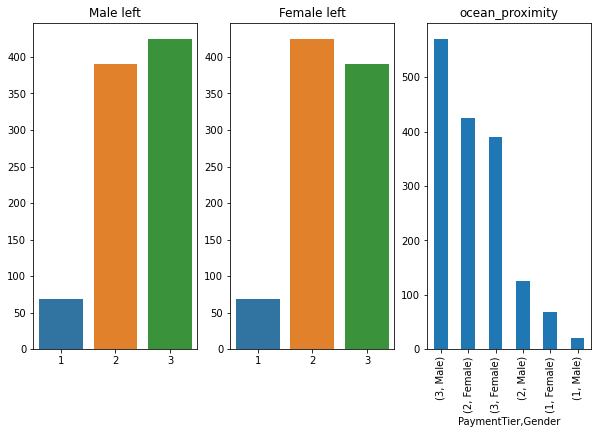

In [180]:
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.title('Male left')
sns.barplot(pm.index, pf.values);

plt.subplot(132)
plt.title('Female left')
sns.barplot(pf.index, pf.values);

plt.subplot(133)
plt.title('All left')
pleft.plot(kind='bar',
            title='ocean_proximity');

 Больше всего увольняются высокооплачиваемые мужчины,
 Далее среднеоплачиваемые женщины, примерно так же - высокооплачиываемые женщины

In [201]:
pf_patm2=empl[(empl['Gender']=='Female')&(empl['LeaveOrNot']==1)][['PaymentTier','ExperienceInCurrentDomain']].value_counts()

pm_patm2=empl[(empl['Gender']=='Male')&(empl['LeaveOrNot']==1)][['PaymentTier','ExperienceInCurrentDomain']].value_counts()


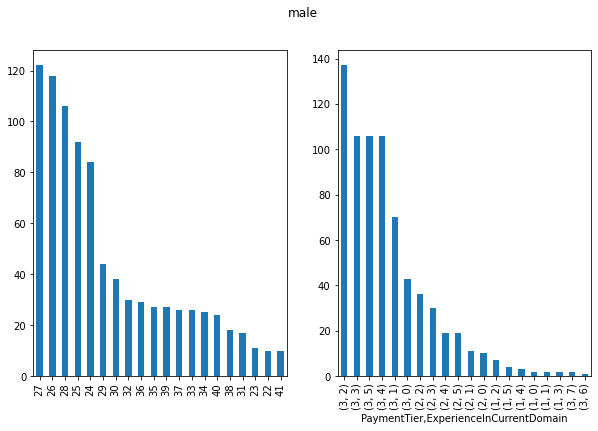

In [236]:
plt.figure(figsize=(10, 6))
plt.title('Exp_vs_paym')

plt.subplot(121)
plt.suptitle('female')
pf_patm2.plot(kind='bar');


plt.subplot(122)
plt.suptitle('male')
pm_patm2.plot(kind='bar');


plt.show()

Больше всего увольнений среди женщин - со средней ЗП и маленьким опытом в этой области. Среди мужчин больше всего увольнений с высоким уровнем зп и низким опытом

In [230]:
age_left=empl[empl['LeaveOrNot']==1].groupby(['Age'])['Gender'].value_counts().unstack()


In [ ]:
age_left=empl[empl['LeaveOrNot']==1].groupby(['Age'])['Gender'].value_counts().unstack()


<Figure size 720x432 with 0 Axes>

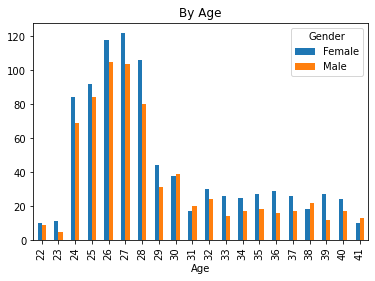

In [237]:
plt.figure(figsize=(10, 6))

age_left.plot(kind='bar')
plt.title('By Age')
plt.show()


In [ ]:
Особой зависимость между возрастом и увольнениями нет 

<AxesSubplot:ylabel='None'>

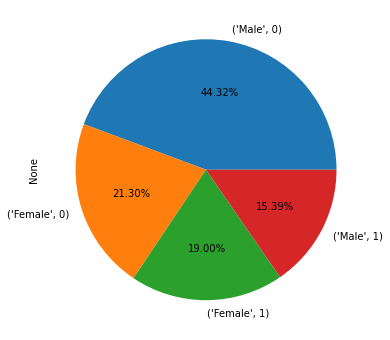

In [246]:
g=empl[['Gender', 'LeaveOrNot']].value_counts()
plt.figure(figsize=(10, 6))
g.plot(kind='pie', labels=g.index, autopct='%.2f%%')

Мужчин больше, чем женщин.
Из всех принятых на работу, остается 21% женщин и 44% мужчин

In [321]:
e=empl.groupby(['City','Gender'], as_index=False)['LeaveOrNot'].agg(['count', 'sum'])
e['part_left']= e['sum']/e['count']
e['part_of_all']=e['sum']/e['count'].sum()

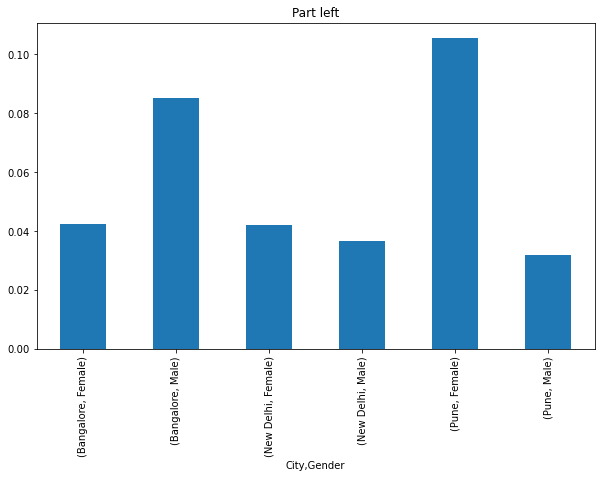

In [322]:
plt.figure(figsize=(10, 6))

e['part_of_all'].plot(kind='bar')
plt.title('Part left')
plt.show()

наибоьшая доля уволенных - женщины в Pune (около 10%) и мужчины в Bangalore (около 8%). Город - важен для таргета

In [331]:
e_pune=empl[(empl['City']=='Pune')&(empl['Gender']=='Female')].groupby(['JoiningYear'])['LeaveOrNot'].agg(['sum', 'count'])
e_pune['part_left']= e_pune['sum']/e_pune['count']
e_pune['part_of_all']=e_pune['sum']/e_pune['count'].sum()

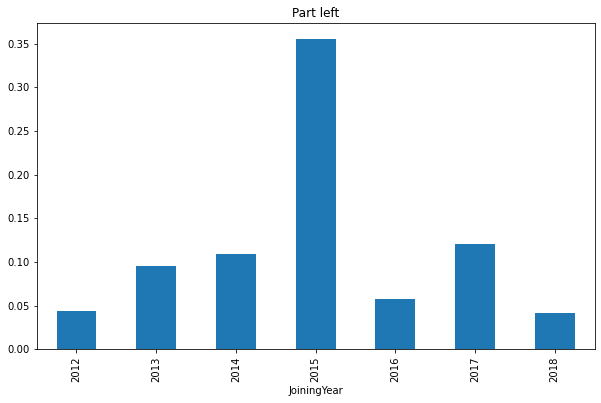

In [333]:
plt.figure(figsize=(10, 6))

e_pune['part_of_all'].plot(kind='bar')
plt.title('Part left')
plt.show()

Большинство уволенных женщин в Pune - приняты в 2015 году

In [339]:
e_pune_2015=empl[(empl['City']=='Pune')&(empl['Gender']=='Female')&(empl['JoiningYear']==2015)].groupby(['Education'])['LeaveOrNot'].agg(['sum', 'count'])
e_pune_2015['part_left']= e_pune_2015['sum']/e_pune_2015['count']
e_pune_2015['part_of_all']=e_pune_2015['sum']/e_pune_2015['count'].sum()

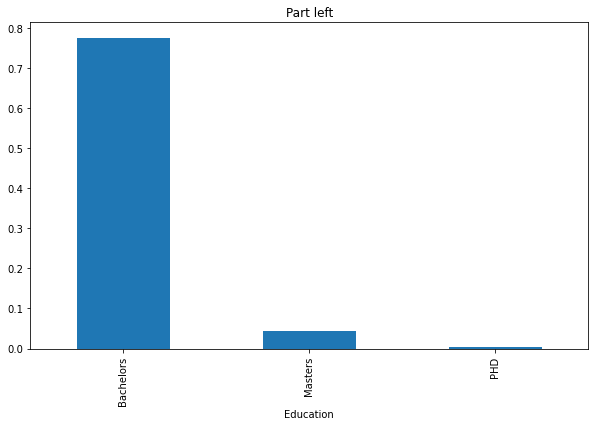

In [340]:
plt.figure(figsize=(10, 6))

e_pune_2015['part_of_all'].plot(kind='bar')
plt.title('Part left')
plt.show()

In [348]:
e_pune_2015_bac=empl[(empl['City']=='Pune')&(empl['Gender']=='Female')&(empl['JoiningYear']==2015)&(empl['Education']=='Bachelors')].groupby(['PaymentTier'])['LeaveOrNot'].agg(['sum', 'count'])
e_pune_2015_bac['part_left']= e_pune_2015_bac['sum']/e_pune_2015_bac['count']
e_pune_2015_bac['part_of_all']=e_pune_2015_bac['sum']/e_pune_2015_bac['count'].sum()

In [345]:
empl[(empl['City']=='Pune')&(empl['Gender']=='Female')&(empl['JoiningYear']==2015)&(empl['Education']=='Bachelors')]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
18,Bachelors,2015,Pune,2,30,Female,No,0,1
51,Bachelors,2015,Pune,2,26,Female,No,4,1
103,Bachelors,2015,Pune,2,28,Female,Yes,1,1
205,Bachelors,2015,Pune,2,26,Female,No,4,1
224,Bachelors,2015,Pune,1,24,Female,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4544,Bachelors,2015,Pune,2,22,Female,No,0,1
4554,Bachelors,2015,Pune,3,28,Female,No,1,1
4610,Bachelors,2015,Pune,3,24,Female,No,2,1
4620,Bachelors,2015,Pune,2,38,Female,No,4,1


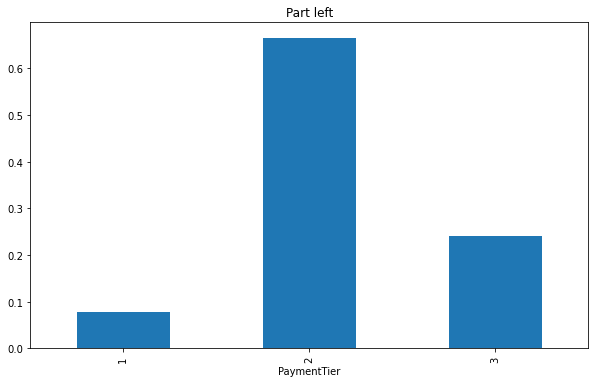

In [349]:
plt.figure(figsize=(10, 6))

e_pune_2015_bac['part_of_all'].plot(kind='bar')
plt.title('Part left')
plt.show()

In [354]:
e_pune_2015_bac_2=empl[(empl['City']=='Pune')&(empl['Gender']=='Female')&(empl['JoiningYear']==2015)&(empl['Education']=='Bachelors')&(empl['PaymentTier']==2)].groupby(['EverBenched'])['LeaveOrNot'].agg(['sum', 'count'])
e_pune_2015_bac_2['part_left']= e_pune_2015_bac_2['sum']/e_pune_2015_bac_2['count']
e_pune_2015_bac_2['part_of_all']=e_pune_2015_bac_2['sum']/e_pune_2015_bac_2['count'].sum()

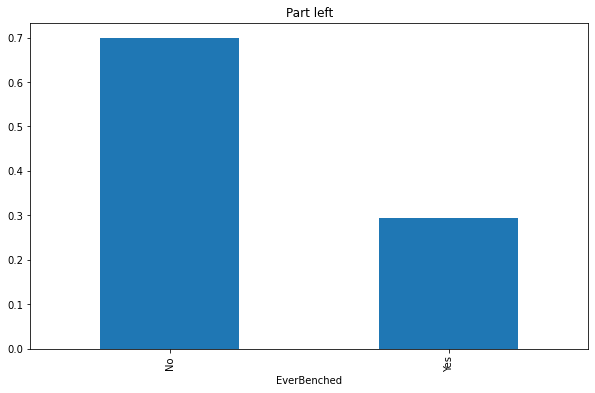

In [355]:
plt.figure(figsize=(10, 6))

e_pune_2015_bac_2['part_of_all'].plot(kind='bar')
plt.title('Part left')
plt.show()

Большая часть из них бакалавры со средним уровнем зп и EverBenched = 0

In [356]:
e_bang=empl[(empl['City']=='Bangalore')&(empl['Gender']=='Male')].groupby(['JoiningYear'])['LeaveOrNot'].agg(['sum', 'count'])
e_bang['part_left']= e_bang['sum']/e_bang['count']
e_bang['part_of_all']=e_bang['sum']/e_bang['count'].sum()

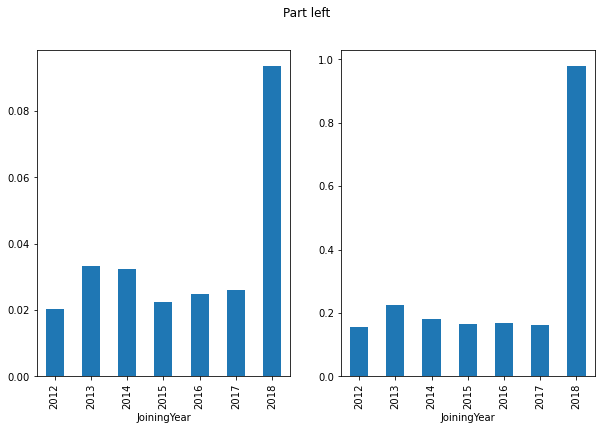

In [359]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
e_bang['part_of_all'].plot(kind='bar')
plt.suptitle('Part left')

plt.subplot(122)
e_bang['part_left'].plot(kind='bar')
plt.suptitle('Part left')

plt.show()

Большинство мужчин, уволенных в Bangalore приняты в 2018 году и почти все, принятые в 2018 году в Bangalore - уволены

In [360]:
e_bang_2018=empl[(empl['City']=='Bangalore')&(empl['Gender']=='Male')&(empl['JoiningYear']==2018)].groupby(['JoiningYear'])['LeaveOrNot'].agg(['sum', 'count'])
e_bang_2018['part_left']= e_bang_2018['sum']/e_bang_2018['count']
e_bang_2018['part_of_all']=e_bang_2018['sum']/e_bang_2018['count'].sum()

In [361]:
e_bang_2018

,sum,count,part_left,part_of_all
JoiningYear,,,,
2018,147,150,0.98,0.98


Посмотрим распределение уволенных по годам приема

In [371]:
empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [365]:
by_join_years=empl.groupby(['JoiningYear'])['LeaveOrNot'].agg(['sum', 'count'])
by_join_years['part_left']= by_join_years['sum']/by_join_years['count']
by_join_years['part_of_all']=by_join_years['sum']/by_join_years['count'].sum()

In [375]:
by_join_years

,sum,count,part_left,part_of_all
JoiningYear,,,,
2012,109,504,0.216270,0.023426
2013,224,669,0.334828,0.048141
2014,173,699,0.247496,0.037180
2015,318,781,0.407170,0.068343
2016,117,525,0.222857,0.025145
2017,297,1108,0.268051,0.063830
2018,362,367,0.986376,0.077799


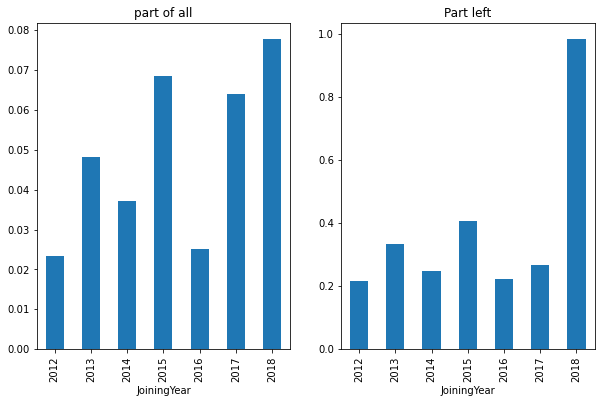

In [384]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
by_join_years['part_of_all'].plot(kind='bar')
plt.title('part of all')


plt.subplot(122)
by_join_years['part_left'].plot(kind='bar')
plt.title('Part left')

plt.show()

Почти все из принятх в 2018 - уволились

In [475]:
#empl_2=empl[empl['JoiningYear']!=2018]
by_gender=empl.groupby(['City','Gender','Education'],as_index=False)[['LeaveOrNot']].agg(['sum','count'])#.unstack(['Gender'])
by_gender['part_left']= by_gender['LeaveOrNot', 'sum']/by_gender['LeaveOrNot', 'count']
by_gender['part_of_all_left']=by_gender['LeaveOrNot', 'sum']/by_gender['LeaveOrNot', 'count'].sum()
by_gender['part_of_all']=by_gender['LeaveOrNot', 'count']/by_gender['LeaveOrNot', 'count'].sum()

In [472]:
by_gender.columns



MultiIndex([( 'LeaveOrNot',   'sum'),
            ( 'LeaveOrNot', 'count'),
            (  'part_left',      ''),
            ('part_of_all',      '')],
           )

In [476]:
by_gender.style.bar(align='zero') 

Около 30% сотрудников-мужчин бакалавров - в Bangalore
Почти все женщины-бакалавры увольняются из Pune
